# Run CleanVision on Torchvision dataset

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cleanlab/cleanvision-examples/blob/main/torchvision_dataset.ipynb) 

In [ ]:
!pip install -U pip
!pip install "cleanvision[pytorch] @ git+https://github.com/cleanlab/cleanvision.git"

**After you install these packages, you may need to restart your notebook runtime before running the rest of this notebook.**

In [2]:
from torchvision.datasets import CIFAR10
from torch.utils.data import ConcatDataset
from cleanvision.imagelab import Imagelab

### 1. Download dataset and concatenate all splits

Since we're interested in generally understanding what issues plague our data, we merge the training and test sets into one larger dataset before running CleanVision. You could alternatively just run the package on these two sets of data separately to obtain two different reports.

[CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) is classification dataset, but CleanVision can be used to audit images from any type of dataset (including supervised or unsupervised learning).

Load all splits of the CIFAR10 dataset

In [3]:
train_set = CIFAR10(root="./", download=True)
test_set = CIFAR10(root="./", train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


Concatenate train and test splits

In [4]:
dataset = ConcatDataset([train_set, test_set])

A sample from the dataset

In [5]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=32x32>, 6)

Let's look at the first image in this dataset

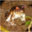

In [6]:
dataset[0][0]

### 2. Run CleanVision

In [7]:
imagelab = Imagelab(torchvision_dataset=dataset)

In [8]:
imagelab.find_issues()

Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale images ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60000/60000 [00:14<00:00, 4026.17it/s]


Issue checks completed. To see a detailed report of issues found, use imagelab.report().


### 3. View Results

Get a report of all the issues found

Issues found in order of severity in the dataset

|    | issue_type      |   num_images |
|---:|:----------------|-------------:|
|  0 | near_duplicates |           40 |
|  1 | dark            |           29 |
|  2 | light           |            3 |
|  3 | low_information |            1 | 


Top 4 sets of images with near_duplicates issue
Set: 0


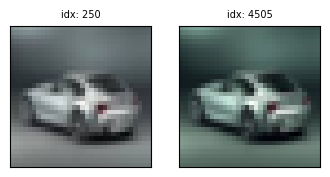

Set: 1


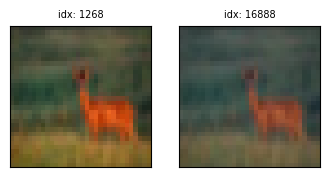

Set: 2


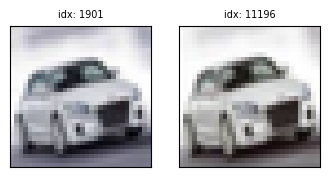

Set: 3


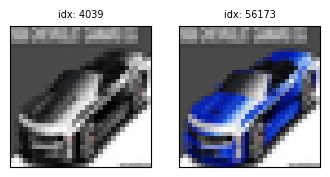


Top 4 examples with dark issue in the dataset.


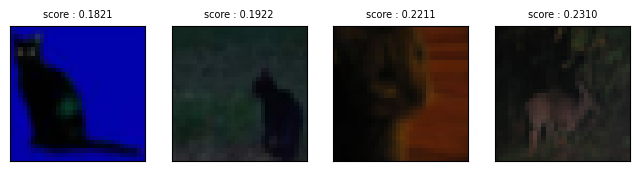

Found 3 examples with light issue in the dataset.


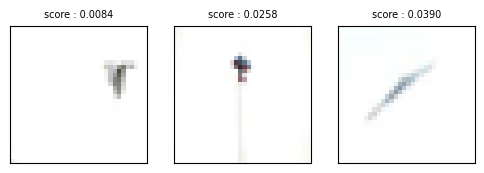

Found 1 example with low_information issue in the dataset.


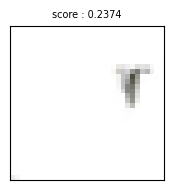

In [9]:
imagelab.report()

View more information about each image, such as what types of issues it exhibits and its quality score with respect to each type of issue.

In [10]:
imagelab.issues

,odd_aspect_ratio_score,is_odd_aspect_ratio_issue,low_information_score,is_low_information_issue,light_score,is_light_issue,grayscale_score,is_grayscale_issue,dark_score,is_dark_issue,blurry_score,is_blurry_issue,is_exact_duplicates_issue,is_near_duplicates_issue
0,1.0,False,0.854301,False,0.797130,False,1,False,0.915605,False,0.484206,False,False,False
1,1.0,False,0.926223,False,0.850131,False,1,False,0.976886,False,0.571952,False,False,False
2,1.0,False,0.818548,False,0.852996,False,1,False,1.000000,False,0.532279,False,False,False
3,1.0,False,0.813629,False,0.844033,False,1,False,0.775992,False,0.401225,False,False,False
4,1.0,False,0.898399,False,0.958406,False,1,False,0.919564,False,0.503716,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,1.0,False,0.860407,False,0.794629,False,1,False,0.996078,False,0.523458,False,False,False
59996,1.0,False,0.888932,False,0.939203,False,1,False,0.843293,False,0.498186,False,False,False
59997,1.0,False,0.818150,False,0.960275,False,1,False,0.865067,False,0.444907,False,False,False
59998,1.0,False,0.900018,False,0.892104,False,1,False,0.952069,False,0.528622,False,False,False


Get indices of all **dark** images in the dataset sorted by their dark score.

In [11]:
indices = imagelab.issues.query('is_dark_issue').sort_values(by='dark_score').index.tolist()

View the 5th darkest image in the dataset

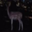

In [12]:
dataset[indices[5]][0]

View global information about each issue, such as how many images in the dataset suffer from this issue.

In [13]:
imagelab.issue_summary

,issue_type,num_images
0,near_duplicates,40
1,dark,29
2,light,3
3,low_information,1
4,blurry,0
5,grayscale,0
6,odd_aspect_ratio,0
7,exact_duplicates,0


**For more detailed guide on how to use CleanVision, check the [tutorial notebook](https://github.com/cleanlab/cleanvision/blob/main/docs/source/tutorials/tutorial.ipynb).**